# Evaluierung der Kursprognosen 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets

**Kursdaten importieren**

In [2]:
def import_actual_stockprices(stocks):
    df_actual_stockprices = pd.DataFrame(columns=['Aktie','Handelstag','Kurs'])
    for stock in stocks:
        df_actual_stockprices_stock = pd.read_csv(stock + '.csv')
        df_actual_stockprices_stock = df_actual_stockprices_stock.drop(['Date','Open','High','Low','Adj Close','Volume'],axis=1)
        df_actual_stockprices_stock = df_actual_stockprices_stock.rename(columns={'Close':'Kurs'})
        df_actual_stockprices_stock['Kurs'] = df_actual_stockprices_stock['Kurs'].round(2)
        df_actual_stockprices_stock['Aktie'] = stock
        df_actual_stockprices_stock['Handelstag'] = [i for i in range(-4, 11, 1)]
        df_actual_stockprices_stock = df_actual_stockprices_stock[['Handelstag', 'Aktie', 'Kurs']]
        df_actual_stockprices = pd.concat([df_actual_stockprices, df_actual_stockprices_stock], ignore_index=True, sort=False)
    
    df_actual_stockprices = df_actual_stockprices.astype({'Handelstag': int})
    return df_actual_stockprices
        

In [3]:
df_actual_stockprices = import_actual_stockprices(['ALV.DE','AMZ.DE','DPW.DE','MDO.DE','NVD.DE','^MDAXI'])

In [4]:
df_actual_stockprices

,Aktie,Handelstag,Kurs
0,ALV.DE,-4,210.00
1,ALV.DE,-3,209.25
2,ALV.DE,-2,208.90
3,ALV.DE,-1,208.45
4,ALV.DE,0,209.15
...,...,...,...
85,^MDAXI,6,27692.90
86,^MDAXI,7,27822.07
87,^MDAXI,8,27432.70
88,^MDAXI,9,26708.44


**Kursprognosen importieren**

In [5]:
df_predicted_stockprices = pd.read_csv('kursprognosen_gruppen_all.csv',sep=';')

In [6]:
df_predicted_stockprices

,Gruppe,Aktie,Handelstag,Kurs
0,Cakmak-Pena,ALV.DE,1,219.51
1,Cakmak-Pena,ALV.DE,2,221.25
2,Cakmak-Pena,ALV.DE,3,222.82
3,Cakmak-Pena,ALV.DE,4,224.28
4,Cakmak-Pena,ALV.DE,5,225.63
...,...,...,...,...
295,Möck-Hansmann-Weischenberg,^MDAXI,6,27110.05
296,Möck-Hansmann-Weischenberg,^MDAXI,7,27136.23
297,Möck-Hansmann-Weischenberg,^MDAXI,8,27162.39
298,Möck-Hansmann-Weischenberg,^MDAXI,9,27188.96


**Plotte Kursprognosen**

In [7]:
def plotte_kursprognose_aktie(stock):
    g = sns.lineplot(data=df_predicted_stockprices[df_predicted_stockprices['Aktie']==stock], x='Handelstag', y='Kurs', hue='Gruppe',markers=True)
    g.set_xticks(np.arange(1,11,1))
    plt.show()

ALV.DE


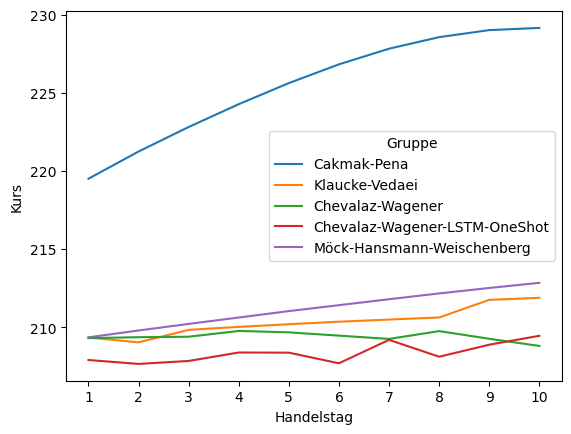

AMZ.DE


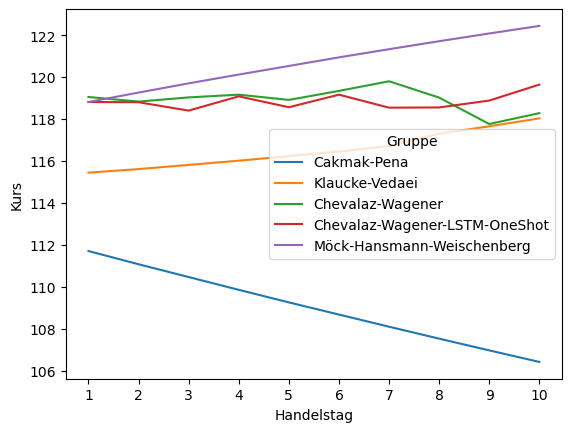

DPW.DE


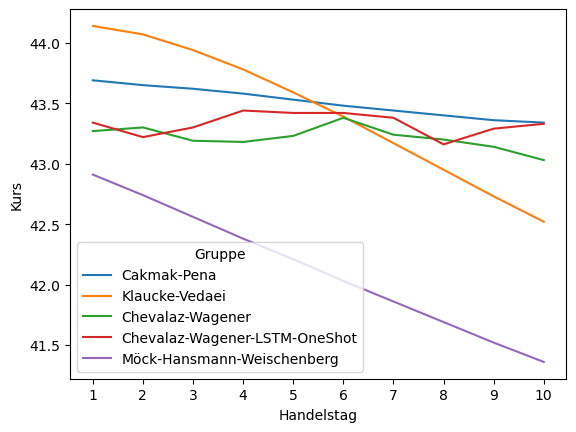

MDO.DE


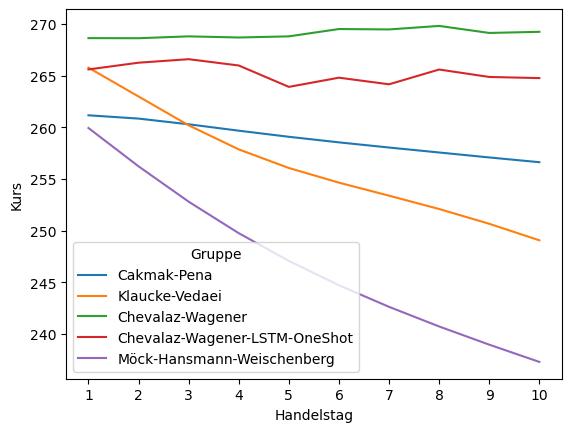

NVD.DE


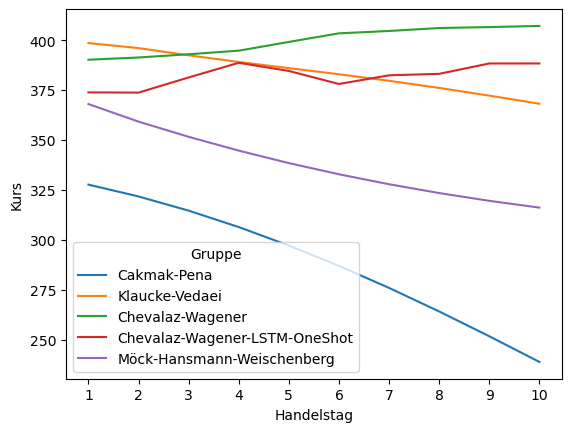

^MDAXI


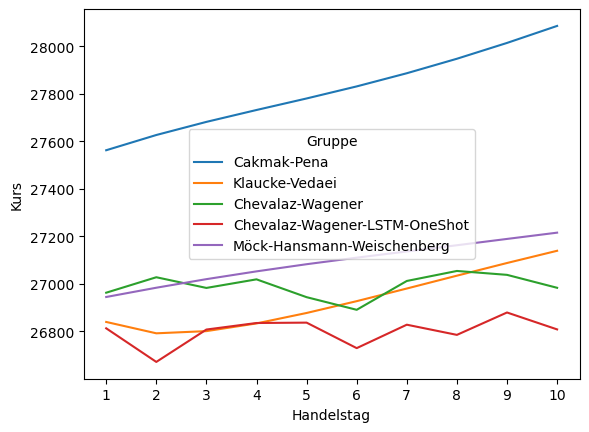

In [8]:
for aktie in df_predicted_stockprices['Aktie'].unique():
    print(aktie)
    plotte_kursprognose_aktie(aktie)

**Merge beide Dataframes 'df_actual_stockprices' und 'df_predicted_stockprices' um ein Dataframe zu bekommen**

In [9]:
df_eval_stockprices = pd.merge(df_predicted_stockprices, df_actual_stockprices[df_actual_stockprices['Handelstag']>0], on=['Aktie','Handelstag'])

In [10]:
df_eval_stockprices

,Gruppe,Aktie,Handelstag,Kurs_x,Kurs_y
0,Cakmak-Pena,ALV.DE,1,219.51,209.20
1,Klaucke-Vedaei,ALV.DE,1,209.35,209.20
2,Chevalaz-Wagener,ALV.DE,1,209.31,209.20
3,Chevalaz-Wagener-LSTM-OneShot,ALV.DE,1,207.91,209.20
4,Möck-Hansmann-Weischenberg,ALV.DE,1,209.36,209.20
...,...,...,...,...,...
295,Cakmak-Pena,^MDAXI,10,28085.90,27015.19
296,Klaucke-Vedaei,^MDAXI,10,27139.05,27015.19
297,Chevalaz-Wagener,^MDAXI,10,26983.20,27015.19
298,Chevalaz-Wagener-LSTM-OneShot,^MDAXI,10,26808.01,27015.19


In [11]:
df_eval_stockprices.rename(columns={'Kurs_x': 'Kursprognose', 'Kurs_y': 'Kurs'},inplace=True)

**Berechnung der Metrik (MAE_Scaled) zur Evaluierung**

Berechne Forecast-Error d.h. absolute Kursabweichung und prozentuale Abweichung

In [12]:
df_eval_stockprices['Absolute_Abweichung'] = (df_eval_stockprices['Kursprognose']-df_eval_stockprices['Kurs']).abs()

In [13]:
df_eval_stockprices['Prozentuale_Abweichung'] = (df_eval_stockprices['Absolute_Abweichung']/df_eval_stockprices['Kurs'])*100

In [14]:
df_eval_stockprices

,Gruppe,Aktie,Handelstag,Kursprognose,Kurs,Absolute_Abweichung,Prozentuale_Abweichung
0,Cakmak-Pena,ALV.DE,1,219.51,209.20,10.31,4.928298
1,Klaucke-Vedaei,ALV.DE,1,209.35,209.20,0.15,0.071702
2,Chevalaz-Wagener,ALV.DE,1,209.31,209.20,0.11,0.052581
3,Chevalaz-Wagener-LSTM-OneShot,ALV.DE,1,207.91,209.20,1.29,0.616635
4,Möck-Hansmann-Weischenberg,ALV.DE,1,209.36,209.20,0.16,0.076482
...,...,...,...,...,...,...,...
295,Cakmak-Pena,^MDAXI,10,28085.90,27015.19,1070.71,3.963363
296,Klaucke-Vedaei,^MDAXI,10,27139.05,27015.19,123.86,0.458483
297,Chevalaz-Wagener,^MDAXI,10,26983.20,27015.19,31.99,0.118415
298,Chevalaz-Wagener-LSTM-OneShot,^MDAXI,10,26808.01,27015.19,207.18,0.766902


Berechne Scaled Percentage Mean Absolute Error (MAE_Scaled)

In [15]:
df_eval_stockprices['MAE_Scaled'] = np.nan

In [16]:
df_eval_stockprices

,Gruppe,Aktie,Handelstag,Kursprognose,Kurs,Absolute_Abweichung,Prozentuale_Abweichung,MAE_Scaled
0,Cakmak-Pena,ALV.DE,1,219.51,209.20,10.31,4.928298,NaN
1,Klaucke-Vedaei,ALV.DE,1,209.35,209.20,0.15,0.071702,NaN
2,Chevalaz-Wagener,ALV.DE,1,209.31,209.20,0.11,0.052581,NaN
3,Chevalaz-Wagener-LSTM-OneShot,ALV.DE,1,207.91,209.20,1.29,0.616635,NaN
4,Möck-Hansmann-Weischenberg,ALV.DE,1,209.36,209.20,0.16,0.076482,NaN
...,...,...,...,...,...,...,...,...
295,Cakmak-Pena,^MDAXI,10,28085.90,27015.19,1070.71,3.963363,NaN
296,Klaucke-Vedaei,^MDAXI,10,27139.05,27015.19,123.86,0.458483,NaN
297,Chevalaz-Wagener,^MDAXI,10,26983.20,27015.19,31.99,0.118415,NaN
298,Chevalaz-Wagener-LSTM-OneShot,^MDAXI,10,26808.01,27015.19,207.18,0.766902,NaN


In [17]:
#Berechne pro Gruppe und Kurs den MAE_Scaled für die einzelnen Handelstage und aktualisiere den Dataframe entsprechend
def calculate_scaled_percentage_mean_absolute_error(df,group,stock):
    condition = (df['Gruppe'] == group) & (df['Aktie'] == stock)
    df_eval_stockprices_filtered = df.loc[condition]
    
    kursprognose = df_eval_stockprices_filtered['Kursprognose'].values
    kurs = df_eval_stockprices_filtered['Kurs'].values
    
    max_days = df_eval_stockprices_filtered['Handelstag'].max()
    
    scaled_percentage_mean_absolute_errors = np.zeros(max_days)
    
    for i in range(1,max_days+1):
        scaled_percentage_mean_absolute_error = np.mean(np.abs(kursprognose[:i] - kurs[:i]))/np.mean(kurs[:i])
        scaled_percentage_mean_absolute_errors[i-1] = scaled_percentage_mean_absolute_error
        
        df.loc[(df['Handelstag']==i)&condition,'MAE_Scaled'] = scaled_percentage_mean_absolute_error * 100   

Ermittle Gruppen und Aktien

In [18]:
groups = df_eval_stockprices['Gruppe'].unique()
groups

array(['Cakmak-Pena', 'Klaucke-Vedaei', 'Chevalaz-Wagener',
       'Chevalaz-Wagener-LSTM-OneShot', 'Möck-Hansmann-Weischenberg'],
      dtype=object)

In [19]:
stocks = df_eval_stockprices['Aktie'].unique()
stocks

array(['ALV.DE', 'AMZ.DE', 'DPW.DE', 'MDO.DE', 'NVD.DE', '^MDAXI'],
      dtype=object)

Berechne pro Gruppe und Kurs den MAE_Scaled für die einzelnen Handelstage

In [20]:
for group in groups:
    for stock in stocks:
        calculate_scaled_percentage_mean_absolute_error(df_eval_stockprices,group,stock)

In [21]:
df_eval_stockprices

,Gruppe,Aktie,Handelstag,Kursprognose,Kurs,Absolute_Abweichung,Prozentuale_Abweichung,MAE_Scaled
0,Cakmak-Pena,ALV.DE,1,219.51,209.20,10.31,4.928298,4.928298
1,Klaucke-Vedaei,ALV.DE,1,209.35,209.20,0.15,0.071702,0.071702
2,Chevalaz-Wagener,ALV.DE,1,209.31,209.20,0.11,0.052581,0.052581
3,Chevalaz-Wagener-LSTM-OneShot,ALV.DE,1,207.91,209.20,1.29,0.616635,0.616635
4,Möck-Hansmann-Weischenberg,ALV.DE,1,209.36,209.20,0.16,0.076482,0.076482
...,...,...,...,...,...,...,...,...
295,Cakmak-Pena,^MDAXI,10,28085.90,27015.19,1070.71,3.963363,2.101602
296,Klaucke-Vedaei,^MDAXI,10,27139.05,27015.19,123.86,0.458483,1.517034
297,Chevalaz-Wagener,^MDAXI,10,26983.20,27015.19,31.99,0.118415,1.356571
298,Chevalaz-Wagener-LSTM-OneShot,^MDAXI,10,26808.01,27015.19,207.18,0.766902,1.752249


**Evaluierung der Kursprognosen und übersichtliche Gegenüberstellung der einzelnen Gruppen**

Performance über alle Aktien

In [22]:
df_eval_stockprices.groupby(['Gruppe']).MAE_Scaled.mean()

Gruppe
Cakmak-Pena                      6.290769
Chevalaz-Wagener                 1.519132
Chevalaz-Wagener-LSTM-OneShot    1.265029
Klaucke-Vedaei                   2.181453
Möck-Hansmann-Weischenberg       3.115379
Name: MAE_Scaled, dtype: float64

In [23]:
sns.set_palette('deep')

[Text(0, 0, 'Cakmak-Pena'),
 Text(1, 0, 'Klaucke-Vedaei'),
 Text(2, 0, 'Chevalaz-Wagener'),
 Text(3, 0, 'Chevalaz-Wagener-LSTM-OneShot'),
 Text(4, 0, 'Möck-Hansmann-Weischenberg')]

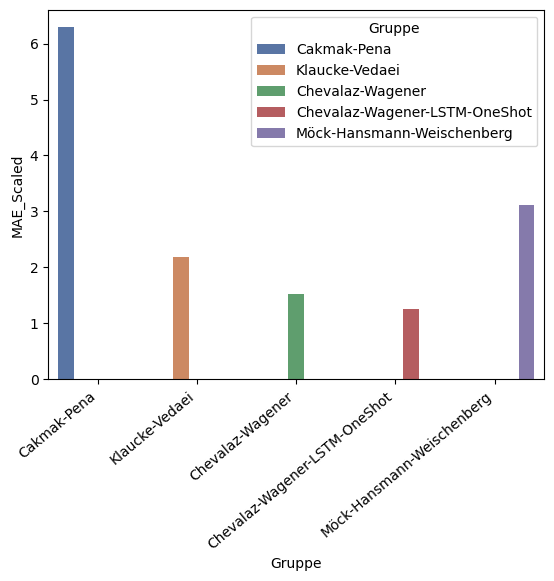

In [24]:
ax = sns.barplot(data=df_eval_stockprices, x='Gruppe', y='MAE_Scaled', hue='Gruppe', errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

Performance gruppiert nach Aktien

<Axes: xlabel='Aktie', ylabel='MAE_Scaled'>

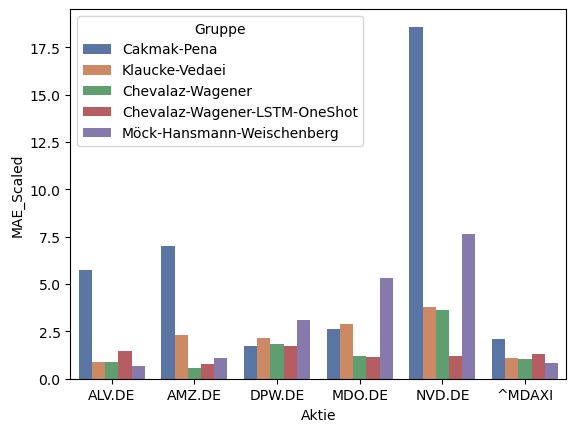

In [25]:
sns.barplot(data=df_eval_stockprices, x='Aktie', y='MAE_Scaled', hue='Gruppe', errorbar=None)

Performance gruppiert nach Aktie bzw. Handelstag

In [26]:
df_eval_stockprices.pivot_table(index=['Aktie','Handelstag'], columns='Gruppe', values='MAE_Scaled')

Gruppe             Cakmak-Pena  Chevalaz-Wagener  \
Aktie  Handelstag                                  
ALV.DE 1              4.928298          0.052581   
       2              4.818074          0.485137   
       3              4.971921          0.678636   
       4              5.296490          0.660579   
       5              5.404203          0.860470   
       6              5.524544          1.052632   
       7              5.716790          1.166953   
       8              6.258206          1.154415   
       9              6.950003          1.351037   
       10             7.473428          1.448930   
AMZ.DE 1              6.197514          0.025193   
       2              5.733751          0.685511   
       3              6.348716          0.587376   
       4              6.392868          0.788017   
       5              6.795478          0.688491   
       6              7.212443          0.634493   
       7              7.501263          0.630217   
       8              7.802903          0.584771   
       9              7.945080          0.529734   
       10             8.154977          0.478614   
DPW.DE 1              1.604651          0.627907   
       2              0.971098          0.543353   
       3              1.162080          1.207951   
       4              1.222857          1.485714   
       5              1.520047          1.865926   
       6              1.895126          2.219789   
       7              2.217995          2.559721   
       8              2.324206          2.679175   
       9              2.125257          2.496613   
       10             2.054237          2.458757   
MDO.DE 1              1.034483          1.796135   
       2              1.300813          1.582530   
       3              1.644456          1.342721   
       4              2.187177          1.115179   
       5              2.707695          1.126897   
       6              3.061719          1.065946   
       7              3.324646          1.008935   
       8              3.565985          0.973513   
       9              3.729310          0.929129   
       10             3.784005          0.879292   
NVD.DE 1             13.702094          2.776241   
       2             13.876252          3.654088   
       3             15.061902          3.487686   
       4             16.033315          3.721453   
       5             17.461295          3.647183   
       6             18.957213          3.652375   
       7             20.460384          3.661414   
       8             21.996091          3.675843   
       9             23.362924          3.945086   
       10            24.934818          3.978039   
^MDAXI 1              2.719098          0.483513   
       2              2.721070          0.489809   
       3              2.376034          0.618895   
       4              2.275614          0.625586   
       5              1.937963          0.989523   
       6              1.694244          1.312770   
       7              1.481565          1.545366   
       8              1.531194          1.524632   
       9              1.896655          1.492871   
       10             2.101602          1.356571   

Gruppe             Chevalaz-Wagener-LSTM-OneShot  Klaucke-Vedaei  \
Aktie  Handelstag                                                  
ALV.DE 1                                0.616635        0.071702   
       2                                1.172414        0.573127   
       3                                1.381001        0.667563   
       4                                1.350806        0.621442   
       5                                1.534457        0.780008   
       6                                1.752549        0.915640   
       7                                1.770317        0.966057   
       8                                1.586729        1.029629   
       9                                1.716910        1.371100   
       10                  

Performance gruppiert nach Aktie bzw. Handelstag (nur 1,3,5,10 Tag)

In [27]:
df_eval_stockprices_filtered_days = df_eval_stockprices.loc[df_eval_stockprices['Handelstag'].isin([1,3,5,10])]
df_eval_stockprices_filtered_days.pivot_table(index=['Aktie','Handelstag'], columns='Gruppe', values='MAE_Scaled')

Gruppe             Cakmak-Pena  Chevalaz-Wagener  \
Aktie  Handelstag                                  
ALV.DE 1              4.928298          0.052581   
       3              4.971921          0.678636   
       5              5.404203          0.860470   
       10             7.473428          1.448930   
AMZ.DE 1              6.197514          0.025193   
       3              6.348716          0.587376   
       5              6.795478          0.688491   
       10             8.154977          0.478614   
DPW.DE 1              1.604651          0.627907   
       3              1.162080          1.207951   
       5              1.520047          1.865926   
       10             2.054237          2.458757   
MDO.DE 1              1.034483          1.796135   
       3              1.644456          1.342721   
       5              2.707695          1.126897   
       10             3.784005          0.879292   
NVD.DE 1             13.702094          2.776241   
       3             15.061902          3.487686   
       5             17.461295          3.647183   
       10            24.934818          3.978039   
^MDAXI 1              2.719098          0.483513   
       3              2.376034          0.618895   
       5              1.937963          0.989523   
       10             2.101602          1.356571   

Gruppe             Chevalaz-Wagener-LSTM-OneShot  Klaucke-Vedaei  \
Aktie  Handelstag                                                  
ALV.DE 1                                0.616635        0.071702   
       3                                1.381001        0.667563   
       5                                1.534457        0.780008   
       10                               1.810209        1.613841   
AMZ.DE 1                                0.226738        3.056769   
       3                                0.823450        2.518127   
       5                                0.875802        2.278097   
       10                               0.817351        1.813341   
DPW.DE 1                                0.790698        2.651163   
       3                                1.238532        1.582569   
       5                                1.679334        1.652027   
       10                               2.232768        2.630508   
MDO.DE 1                                0.647973        0.712391   
       3                                0.385969        1.281116   
       5                                1.126150        2.852763   
       10                               1.647465        4.897057   
NVD.DE 1                                1.532991        4.973001   
       3                                0.600079        4.590915   
       5                                1.002633        3.334913   
       10                               1.386641        3.342874   
^MDAXI 1                                0.075281        0.024559   
       3                                0.810896        0.653473   
       5                                1.318431        1.195884   
       10                               1.752249        1.517034   

Gruppe             Möck-Hansmann-Weischenberg  
Aktie  Handelstag                              
ALV.DE 1                             0.076482  
       3                             0.488808  
       5                             0.536729  
       10                            1.534245  
AMZ.DE 1                             0.226738  
       3                             0.699792  
       5                             1.073237  
       10                            1.744245  
DPW.DE 1                             0.209302  
       3                             1.980122  
       5                             3.153871  
       10                            4.800000  
MDO.DE 1                             1.500568  
       3                             3.321599  
       5                             5.345098  
       10                            8.199420  
NVD.DE 1      

In [39]:
df_eval_stockprices_filtered_days.groupby(['Gruppe']).MAE_Scaled.mean()

Gruppe
Cakmak-Pena                      6.086708
Chevalaz-Wagener                 1.394314
Chevalaz-Wagener-LSTM-OneShot    1.096406
Klaucke-Vedaei                   2.112154
Möck-Hansmann-Weischenberg       2.710637
Name: MAE_Scaled, dtype: float64

In [28]:
df_eval_stockprices_filtered_days = df_eval_stockprices.loc[df_eval_stockprices['Handelstag'].isin([1,3,5,10])]
df_eval_stockprices_filtered_days.pivot_table(index=['Aktie','Handelstag'], columns='Gruppe', values='Prozentuale_Abweichung')

Gruppe             Cakmak-Pena  Chevalaz-Wagener  \
Aktie  Handelstag                                  
ALV.DE 1              4.928298          0.052581   
       3              5.277581          1.063076   
       5              5.830206          1.651032   
       10            12.333333          2.357843   
AMZ.DE 1              6.197514          0.025193   
       3              7.564854          0.393305   
       5              8.393426          0.293476   
       10            10.050719          0.016906   
DPW.DE 1              1.604651          0.627907   
       3              1.534989          2.505643   
       5              2.682763          3.353454   
       10             1.410373          2.115560   
MDO.DE 1              1.034483          1.796135   
       3              2.326454          0.866792   
       5              4.746324          1.172794   
       10             4.278254          0.428944   
NVD.DE 1             13.702094          2.776241   
       3             17.408769          3.158309   
       5             23.055807          3.356209   
       10            38.834678          4.269433   
^MDAXI 1              2.719098          0.483513   
       3              1.695012          0.873681   
       5              0.615490          2.414951   
       10             3.963363          0.118415   

Gruppe             Chevalaz-Wagener-LSTM-OneShot  Klaucke-Vedaei  \
Aktie  Handelstag                                                  
ALV.DE 1                                0.616635        0.071702   
       3                                1.795417        0.855185   
       5                                2.260788        1.407129   
       10                               2.676471        3.867647   
AMZ.DE 1                                0.226738        3.056769   
       3                                0.920502        3.087866   
       5                                0.586953        2.540667   
       10                               1.132713        0.228233   
DPW.DE 1                                0.790698        2.651163   
       3                                2.257336        0.812641   
       5                                2.928683        2.548625   
       10                               1.433121        3.275705   
MDO.DE 1                                0.647973        0.712391   
       3                                0.037523        2.363977   
       5                                2.970588        5.856618   
       10                               1.242074        7.098098   
NVD.DE 1                                1.532991        4.973001   
       3                                0.107640        3.021790   
       5                                0.409167        0.044024   
       10                               0.545524        5.711359   
^MDAXI 1                                0.075281        0.024559   
       3                                1.517389        1.541855   
       5                                2.803245        2.655982   
       10                               0.766902        0.458483   

Gruppe             Möck-Hansmann-Weischenberg  
Aktie  Handelstag                              
ALV.DE 1                             0.076482  
       3                             0.675644  
       5                             1.013133  
       10                            4.338235  
AMZ.DE 1                             0.226738  
       3                             0.167364  
       5                             1.064900  
       10                            3.499577  
DPW.DE 1                             0.209302  
       3                             3.927765  
       5                             5.633803  
       10                            5.914468  
MDO.DE 1                             1.500568  
       3                             5.136961  
       5                             9.161765  
       10                           11.488251  
NVD.DE 1      

Plotte Kursprognose und tatsächlichen Kurse pro Aktie

In [29]:
def plotte_kursprognose(stock):
    g = sns.lineplot(data=df_actual_stockprices[df_actual_stockprices['Aktie']==stock], x='Handelstag', y='Kurs',color='black')
    g = sns.lineplot(data=df_predicted_stockprices[df_predicted_stockprices['Aktie']==stock], x='Handelstag', y='Kurs', hue='Gruppe',markers=True)
    g.set_xticks(np.arange(-4,11,1))

In [30]:
stocks_dropdown = widgets.Dropdown(options=stocks,value='ALV.DE',description='Aktie')

In [31]:
interact(plotte_kursprognose, stock=stocks_dropdown)

interactive(children=(Dropdown(description='Aktie', options=('ALV.DE', 'AMZ.DE', 'DPW.DE', 'MDO.DE', 'NVD.DE',…

<function __main__.plotte_kursprognose(stock)>

Plotte MAE_Scaled für die verschiedenen Handelstage pro Aktie

In [32]:
def plotte_mae_scaled(stock):
    
    sns.barplot(data=df_eval_stockprices[df_eval_stockprices['Aktie']==stock], x='Handelstag', y='MAE_Scaled', hue='Gruppe')
    plt.show()
    g = sns.lineplot(data=df_eval_stockprices[df_eval_stockprices['Aktie']==stock], x='Handelstag', y='MAE_Scaled', hue='Gruppe')
    g.set_xticks(np.arange(1,11,1))
    plt.show()

In [33]:
stocks_dropdown = widgets.Dropdown(options=stocks,value='ALV.DE',description='Aktie')

In [34]:
interact(plotte_mae_scaled, stock=stocks_dropdown)

interactive(children=(Dropdown(description='Aktie', options=('ALV.DE', 'AMZ.DE', 'DPW.DE', 'MDO.DE', 'NVD.DE',…

<function __main__.plotte_mae_scaled(stock)>

Plotte Prozentuale_Abweichung für die verschiedenen Handelstage pro Aktie

In [35]:
def plotte_prozentuale_abweichung(stock):
    
    sns.barplot(data=df_eval_stockprices[df_eval_stockprices['Aktie']==stock], x='Handelstag', y='Prozentuale_Abweichung', hue='Gruppe')
    plt.show()
    g = sns.lineplot(data=df_eval_stockprices[df_eval_stockprices['Aktie']==stock], x='Handelstag', y='Prozentuale_Abweichung', hue='Gruppe')
    g.set_xticks(np.arange(1,11,1))
    plt.show()

In [36]:
stocks_dropdown = widgets.Dropdown(options=stocks,value='ALV.DE',description='Aktie')

In [37]:
interact(plotte_prozentuale_abweichung, stock=stocks_dropdown)

interactive(children=(Dropdown(description='Aktie', options=('ALV.DE', 'AMZ.DE', 'DPW.DE', 'MDO.DE', 'NVD.DE',…

<function __main__.plotte_prozentuale_abweichung(stock)>